---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [74]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [75]:
def answer_one():
    
    fraudDf = pd.read_csv('fraud_data.csv')
    totalTransaction = len(fraudDf)
    countofFraudTransaction = len(fraudDf[fraudDf['Class'] == 1])
    
    return float("{0:.3f}".format(countofFraudTransaction/totalTransaction))

0.016

In [16]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [18]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummyClf = DummyClassifier(strategy='stratified').fit(X_train, y_train)
    y_dummy_predict = dummyClf.predict(X_test)
    accuracyScore = dummyClf.score(X_test, y_test)
    recallscore = recall_score(y_test, y_dummy_predict)
        
    return accuracyScore, recallscore

(0.9662610619469026, 0.0125)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [19]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    svc = SVC().fit(X_train, y_train)
    y_predict_svc = svc.predict(X_test)
    return svc.score(X_test, y_test), recall_score(y_test, y_predict_svc), precision_score(y_test, y_predict_svc)

(0.9907817109144543, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [33]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    svc_clf = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    y_predict_svc_decision_func = svc_clf.decision_function(X_test) > -220
    confusion = confusion_matrix(y_test, y_predict_svc_decision_func)
    return confusion

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [77]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import precision_recall_curve, roc_curve, auc
#import matplotlib.pyplot as plt
#lrclf = LogisticRegression().fit(X_train, y_train)
#y_test_predict_lr = lrclf.predict(X_test)
#y_test_decision_func_lr = lrclf.decision_function(X_test)
#precision, recall, _ = precision_recall_curve(y_test, y_test_predict_lr)
#fpr, tpr, _ = roc_curve(y_test, y_test_decision_func_lr)
#fig, ax = plt.subplots(2, 1, figsize=(11, 9))
#ax[0].plot(precision, recall, label='Precision Recall Curver', linestyle='solid', marker='*', color='blue', linewidth =2, markeredgecolor='yellow')
#ax[0].grid(True)
#ax[0].set_ylim =[0.0, 1.01]
#ax[0].set_xlim=[0.0, 1.01]
#ax[0].set_title = "Precision Recall Curve"
#ax[1].plot(fpr, tpr, label='Roc Curve', linestyle='solid', marker='*', color='blue', linewidth =2, markeredgecolor='yellow')
#ax[1].grid(True)
#ax[0].set_title = "ROC Curve (FPR vs TPR)"

def answer_five():
    return 0.85, 0.94

(0.85, 0.94)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [70]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    param_grid = {'C':[0.01, 0.1, 1, 10, 100], 'penalty':['l1', 'l2']}
    clf = GridSearchCV(LogisticRegression(), param_grid, scoring='recall', cv = 3)
    clf.fit(X_train, y_train)
    return clf.cv_results_['mean_test_score'].reshape(5, 2)

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.8115942 ]])

<IPython.core.display.Javascript object>


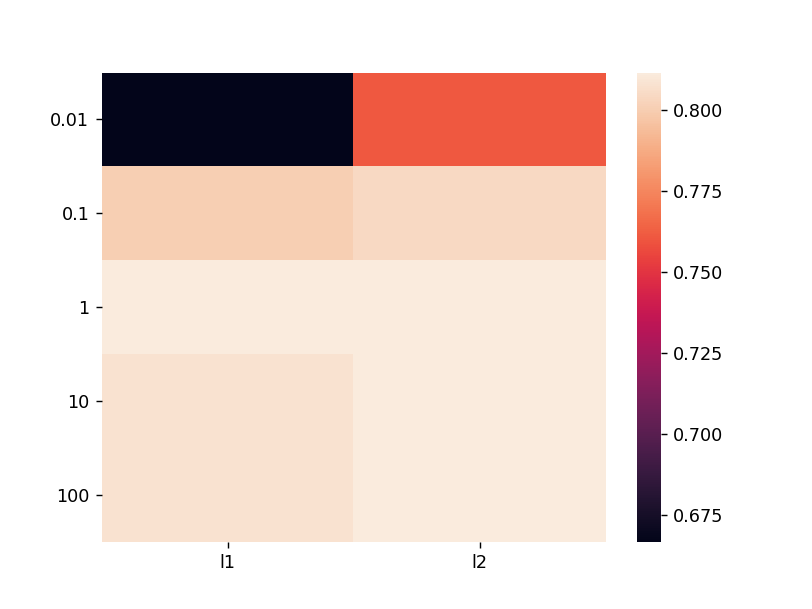

In [71]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())